<a href="https://colab.research.google.com/github/rodayna-moamen/fraud_detection_project/blob/main/ml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/train_processed (1).csv')

# Separate features and target variable
X = train_data.drop('Fraud', axis=1)  # All columns except the target
y = train_data['Fraud']  # Target variable

# Drop non-numeric columns (e.g., 'Provider' or any other categorical features)
X = X.select_dtypes(include=['number'])  # Select only numeric columns

# Handle missing values separately for numeric columns
X.fillna(X.mean(), inplace=True)  # Impute missing values with column mean for numeric columns

# Scaling the features (important for algorithms like Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Only numeric columns are scaled

# Handling class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split (Stratified to preserve class distribution)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
print(train_data.columns)

Index(['Provider', 'TotalClaims', 'UniquePatients', 'TotalReimbursed',
       'AvgReimbursed', 'StdReimbursed', 'MaxReimbursed', 'MinReimbursed',
       'TotalDeductible', 'AvgDeductible', 'StdDeductible', 'InpatientClaims',
       'OutpatientClaims', 'ClaimsPerPatient', 'AvgReimbursedPerPatient',
       'AvgDeductiblePerPatient', 'InpatientRatio', 'OutpatientRatio',
       'ReimbursedPerClaim', 'DeductiblePerClaim', 'AvgPatientAge',
       'DeceasedRate', 'Alzheimer_Rate', 'Heartfailure_Rate',
       'KidneyDisease_Rate', 'Cancer_Rate', 'ObstrPulmonary_Rate',
       'Depression_Rate', 'Diabetes_Rate', 'IschemicHeart_Rate',
       'Osteoporasis_Rate', 'rheumatoidarthritis_Rate', 'stroke_Rate',
       'AvgIPAnnualReimb', 'AvgIPAnnualDeduct', 'AvgOPAnnualReimb',
       'AvgOPAnnualDeduct', 'PotentialFraud', 'Fraud'],
      dtype='object')


In [ ]:
# Logistic Regression (Baseline Model)
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)

# Evaluate Logistic Regression Model
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred_logreg))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_val, y_pred_logreg))
print("Logistic Regression PR-AUC:", average_precision_score(y_val, y_pred_logreg))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       981
           1       0.87      0.87      0.87       981

    accuracy                           0.87      1962
   macro avg       0.87      0.87      0.87      1962
weighted avg       0.87      0.87      0.87      1962

Logistic Regression ROC-AUC: 0.8669724770642203
Logistic Regression PR-AUC: 0.8177444618482882


In [ ]:
# Decision Tree (Baseline Model)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

# Evaluate Decision Tree Model
print("Decision Tree Classification Report:\n", classification_report(y_val, y_pred_dt))
print("Decision Tree ROC-AUC:", roc_auc_score(y_val, y_pred_dt))
print("Decision Tree PR-AUC:", average_precision_score(y_val, y_pred_dt))

# Visualizing the Confusion Matrix for both models
from sklearn.metrics import confusion_matrix
logreg_cm = confusion_matrix(y_val, y_pred_logreg)
dt_cm = confusion_matrix(y_val, y_pred_dt)


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       981
           1       0.90      0.94      0.92       981

    accuracy                           0.92      1962
   macro avg       0.92      0.92      0.92      1962
weighted avg       0.92      0.92      0.92      1962

Decision Tree ROC-AUC: 0.9153924566768603
Decision Tree PR-AUC: 0.872198100151667


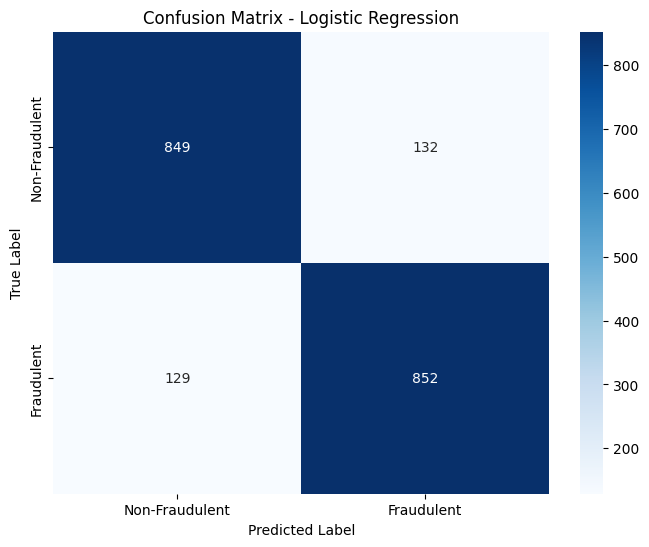

In [ ]:
# Plotting confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

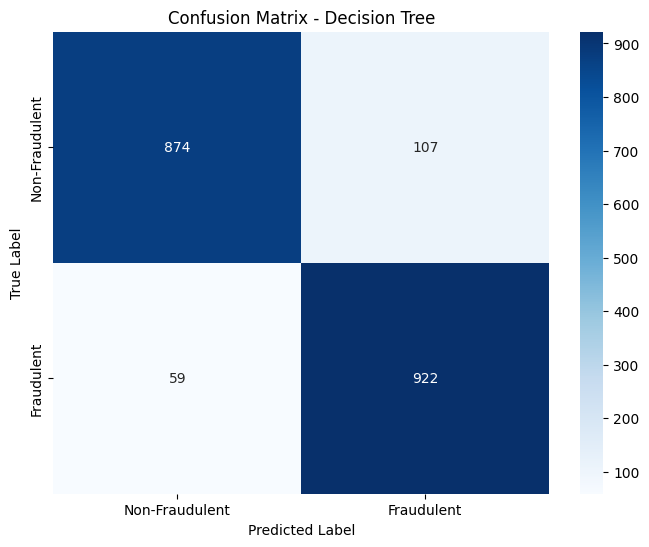

In [ ]:
# Plotting confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
import joblib
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(dt, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [ ]:
# --- 1. Random Forest Model ---
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Evaluate Random Forest Model
print("Random Forest Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_val, y_pred_rf))
print("Random Forest PR-AUC:", average_precision_score(y_val, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       981
           1       0.93      0.98      0.95       981

    accuracy                           0.95      1962
   macro avg       0.95      0.95      0.95      1962
weighted avg       0.95      0.95      0.95      1962

Random Forest ROC-AUC: 0.9525993883792049
Random Forest PR-AUC: 0.9214007897627743


In [ ]:
# --- 2. Gradient Boosting Model ---
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)

# Evaluate Gradient Boosting Model
print("Gradient Boosting Classification Report:\n", classification_report(y_val, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_val, y_pred_gb))
print("Gradient Boosting PR-AUC:", average_precision_score(y_val, y_pred_gb))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       981
           1       0.90      0.94      0.92       981

    accuracy                           0.92      1962
   macro avg       0.92      0.92      0.92      1962
weighted avg       0.92      0.92      0.92      1962

Gradient Boosting ROC-AUC: 0.9179408766564731
Gradient Boosting PR-AUC: 0.8750128408758664


In [ ]:
# --- 3. Hyperparameter Tuning for Random Forest ---
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Best Random Forest after hyperparameter tuning
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Evaluate tuned Random Forest
y_pred_best_rf = best_rf.predict(X_val)
print("Tuned Random Forest Classification Report:\n", classification_report(y_val, y_pred_best_rf))
print("Tuned Random Forest ROC-AUC:", roc_auc_score(y_val, y_pred_best_rf))
print("Tuned Random Forest PR-AUC:", average_precision_score(y_val, y_pred_best_rf))


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       981
           1       0.93      0.98      0.95       981

    accuracy                           0.95      1962
   macro avg       0.95      0.95      0.95      1962
weighted avg       0.95      0.95      0.95      1962

Tuned Random Forest ROC-AUC: 0.9515800203873598
Tuned Random Forest PR-AUC: 0.9192619144795603


In [ ]:
# --- 4. Hyperparameter Tuning for Gradient Boosting ---
param_grid_gb = {
    'n_estimators': [50, 100, 150],  # Reduced the range for quicker execution
    'learning_rate': [0.01, 0.1],  # Reduced the number of learning rates tested
    'max_depth': [3, 5],  # Reduced max_depth options for faster results
}

# Use GridSearchCV with parallel processing to speed up cross-validation
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,  # Reduced parameter grid
    cv=3,  # 3-fold cross-validation instead of 5
    scoring='roc_auc',  # Optimize for ROC-AUC
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    verbose=1  # Optional: Use verbose=1 to print progress
)

# Perform the grid search
grid_search_gb.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_gb = grid_search_gb.best_estimator_

# Best Gradient Boosting after hyperparameter tuning
print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)

# Evaluate tuned Gradient Boosting
y_pred_best_gb = best_gb.predict(X_val)
print("Tuned Gradient Boosting Classification Report:\n", classification_report(y_val, y_pred_best_gb))
print("Tuned Gradient Boosting ROC-AUC:", roc_auc_score(y_val, y_pred_best_gb))
print("Tuned Gradient Boosting PR-AUC:", average_precision_score(y_val, y_pred_best_gb))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Tuned Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       981
           1       0.92      0.97      0.95       981

    accuracy                           0.95      1962
   macro avg       0.95      0.95      0.95      1962
weighted avg       0.95      0.95      0.95      1962

Tuned Gradient Boosting ROC-AUC: 0.9464831804281345
Tuned Gradient Boosting PR-AUC: 0.9120057147580084


In [ ]:
# --- 5. Model Comparison Table ---
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
roc_auc_scores = [roc_auc_score(y_val, y_pred_logreg), roc_auc_score(y_val, y_pred_dt),
                  roc_auc_score(y_val, y_pred_rf), roc_auc_score(y_val, y_pred_gb)]
pr_auc_scores = [average_precision_score(y_val, y_pred_logreg), average_precision_score(y_val, y_pred_dt),
                 average_precision_score(y_val, y_pred_rf), average_precision_score(y_val, y_pred_gb)]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'ROC-AUC': roc_auc_scores,
    'PR-AUC': pr_auc_scores
})

print(comparison_df)


                 Model   ROC-AUC    PR-AUC
0  Logistic Regression  0.866972  0.817744
1        Decision Tree  0.915392  0.872198
2        Random Forest  0.952599  0.921401
3    Gradient Boosting  0.917941  0.875013


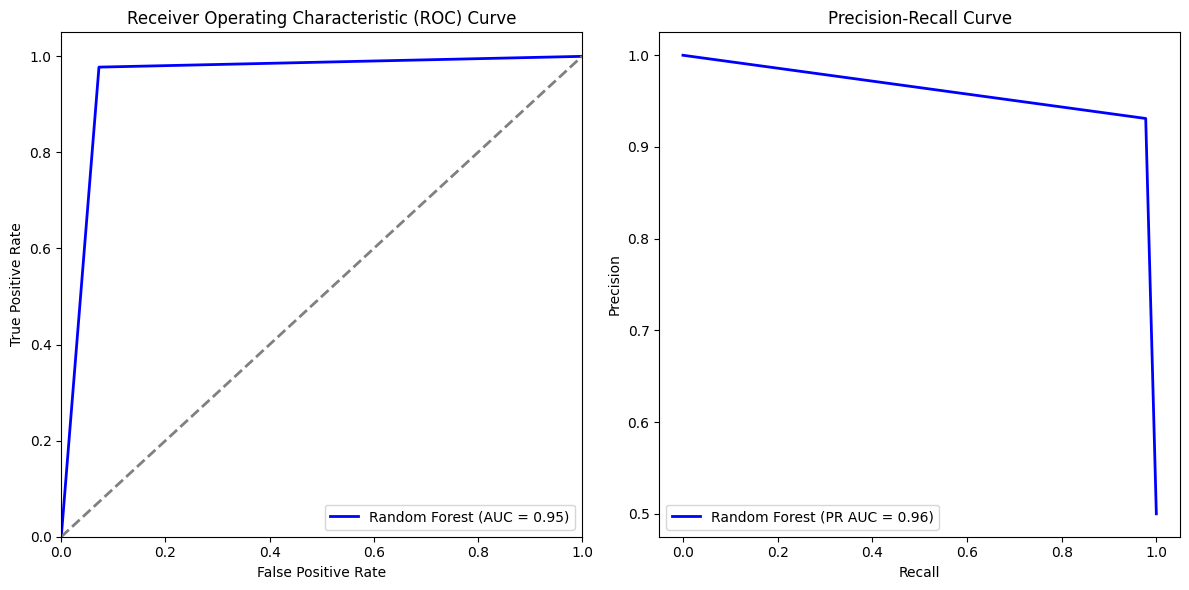

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Example for plotting ROC-AUC curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_val, y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))

# Plot ROC-AUC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Example for PR-AUC curve for Random Forest
precision, recall, _ = precision_recall_curve(y_val, y_pred_rf)
pr_auc = auc(recall, precision)

# Plot PR-AUC Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Random Forest (PR AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()